# Seed Analysis

In this notebook, we load the Pareto-optimal policies for each problem formulation per seed and compare whether the resulting pathways differ or not between the seeds.

In [1]:
import os
import pandas as pd
from ema_workbench import load_results
from dmdu.general.visualization import plot_kpi_pathways_with_seeds

## Identify existing files from experiments with Pareto-optimal policies

In [2]:
target_directory = os.path.join(os.getcwd(), 'data', 'experiments')
files = os.listdir(target_directory)
files

['PRIORITARIAN_DISAGGREGATED_seed_0',
 'PRIORITARIAN_DISAGGREGATED_seed_1',
 'PRIORITARIAN_AGGREGATED_seed_1',
 'PRIORITARIAN_AGGREGATED_seed_0']

## Load all results in appropriate form

In [3]:
seeds_dict = {}
problem_formulations = {}

for file in files:

    # Define path to load data from
    path = os.path.join(target_directory, file)

    # Splitting terms
    terms = file.split('_')
    problem_formulation = terms[0] + '_' + terms[1]
    seed_idx = terms[-1]

    # Load results
    experiments, outcomes = load_results(path)
    outcomes = pd.DataFrame(outcomes)

    # Save data
    seeds_dict[seed_idx] = experiments, outcomes
    problem_formulations[problem_formulation] = seeds_dict

## Visualization of KPI pathways grouped by seed

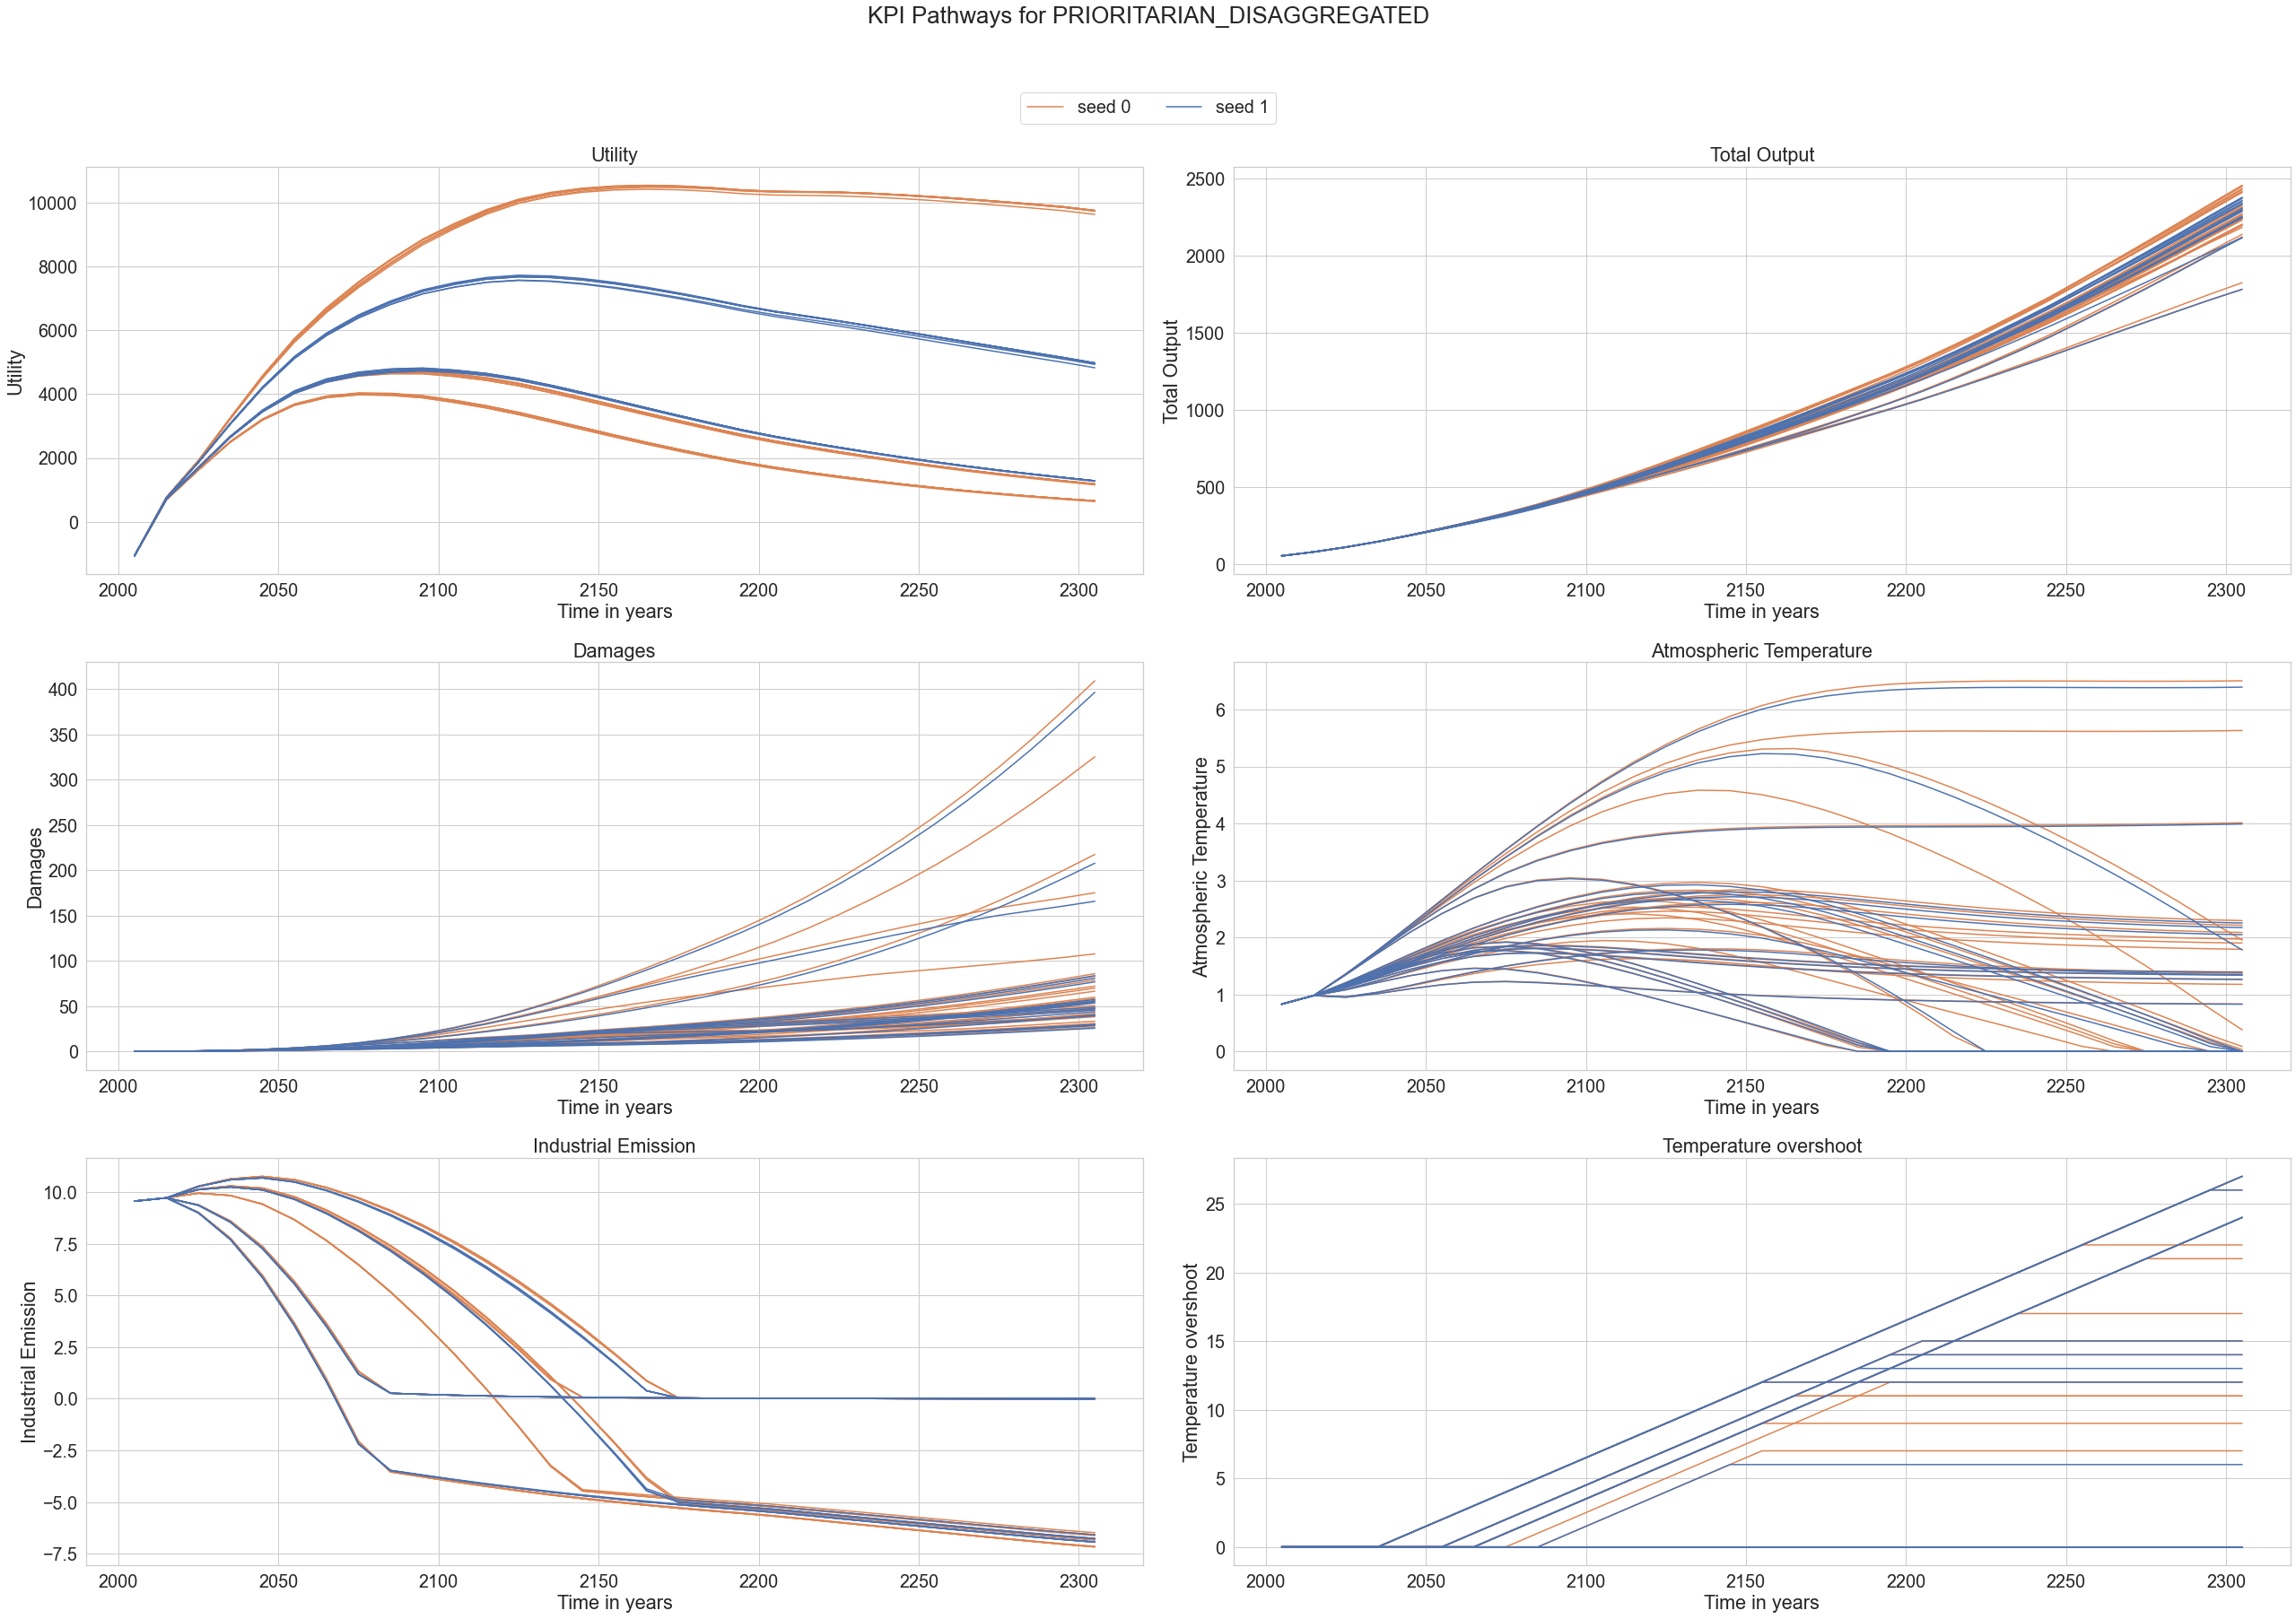

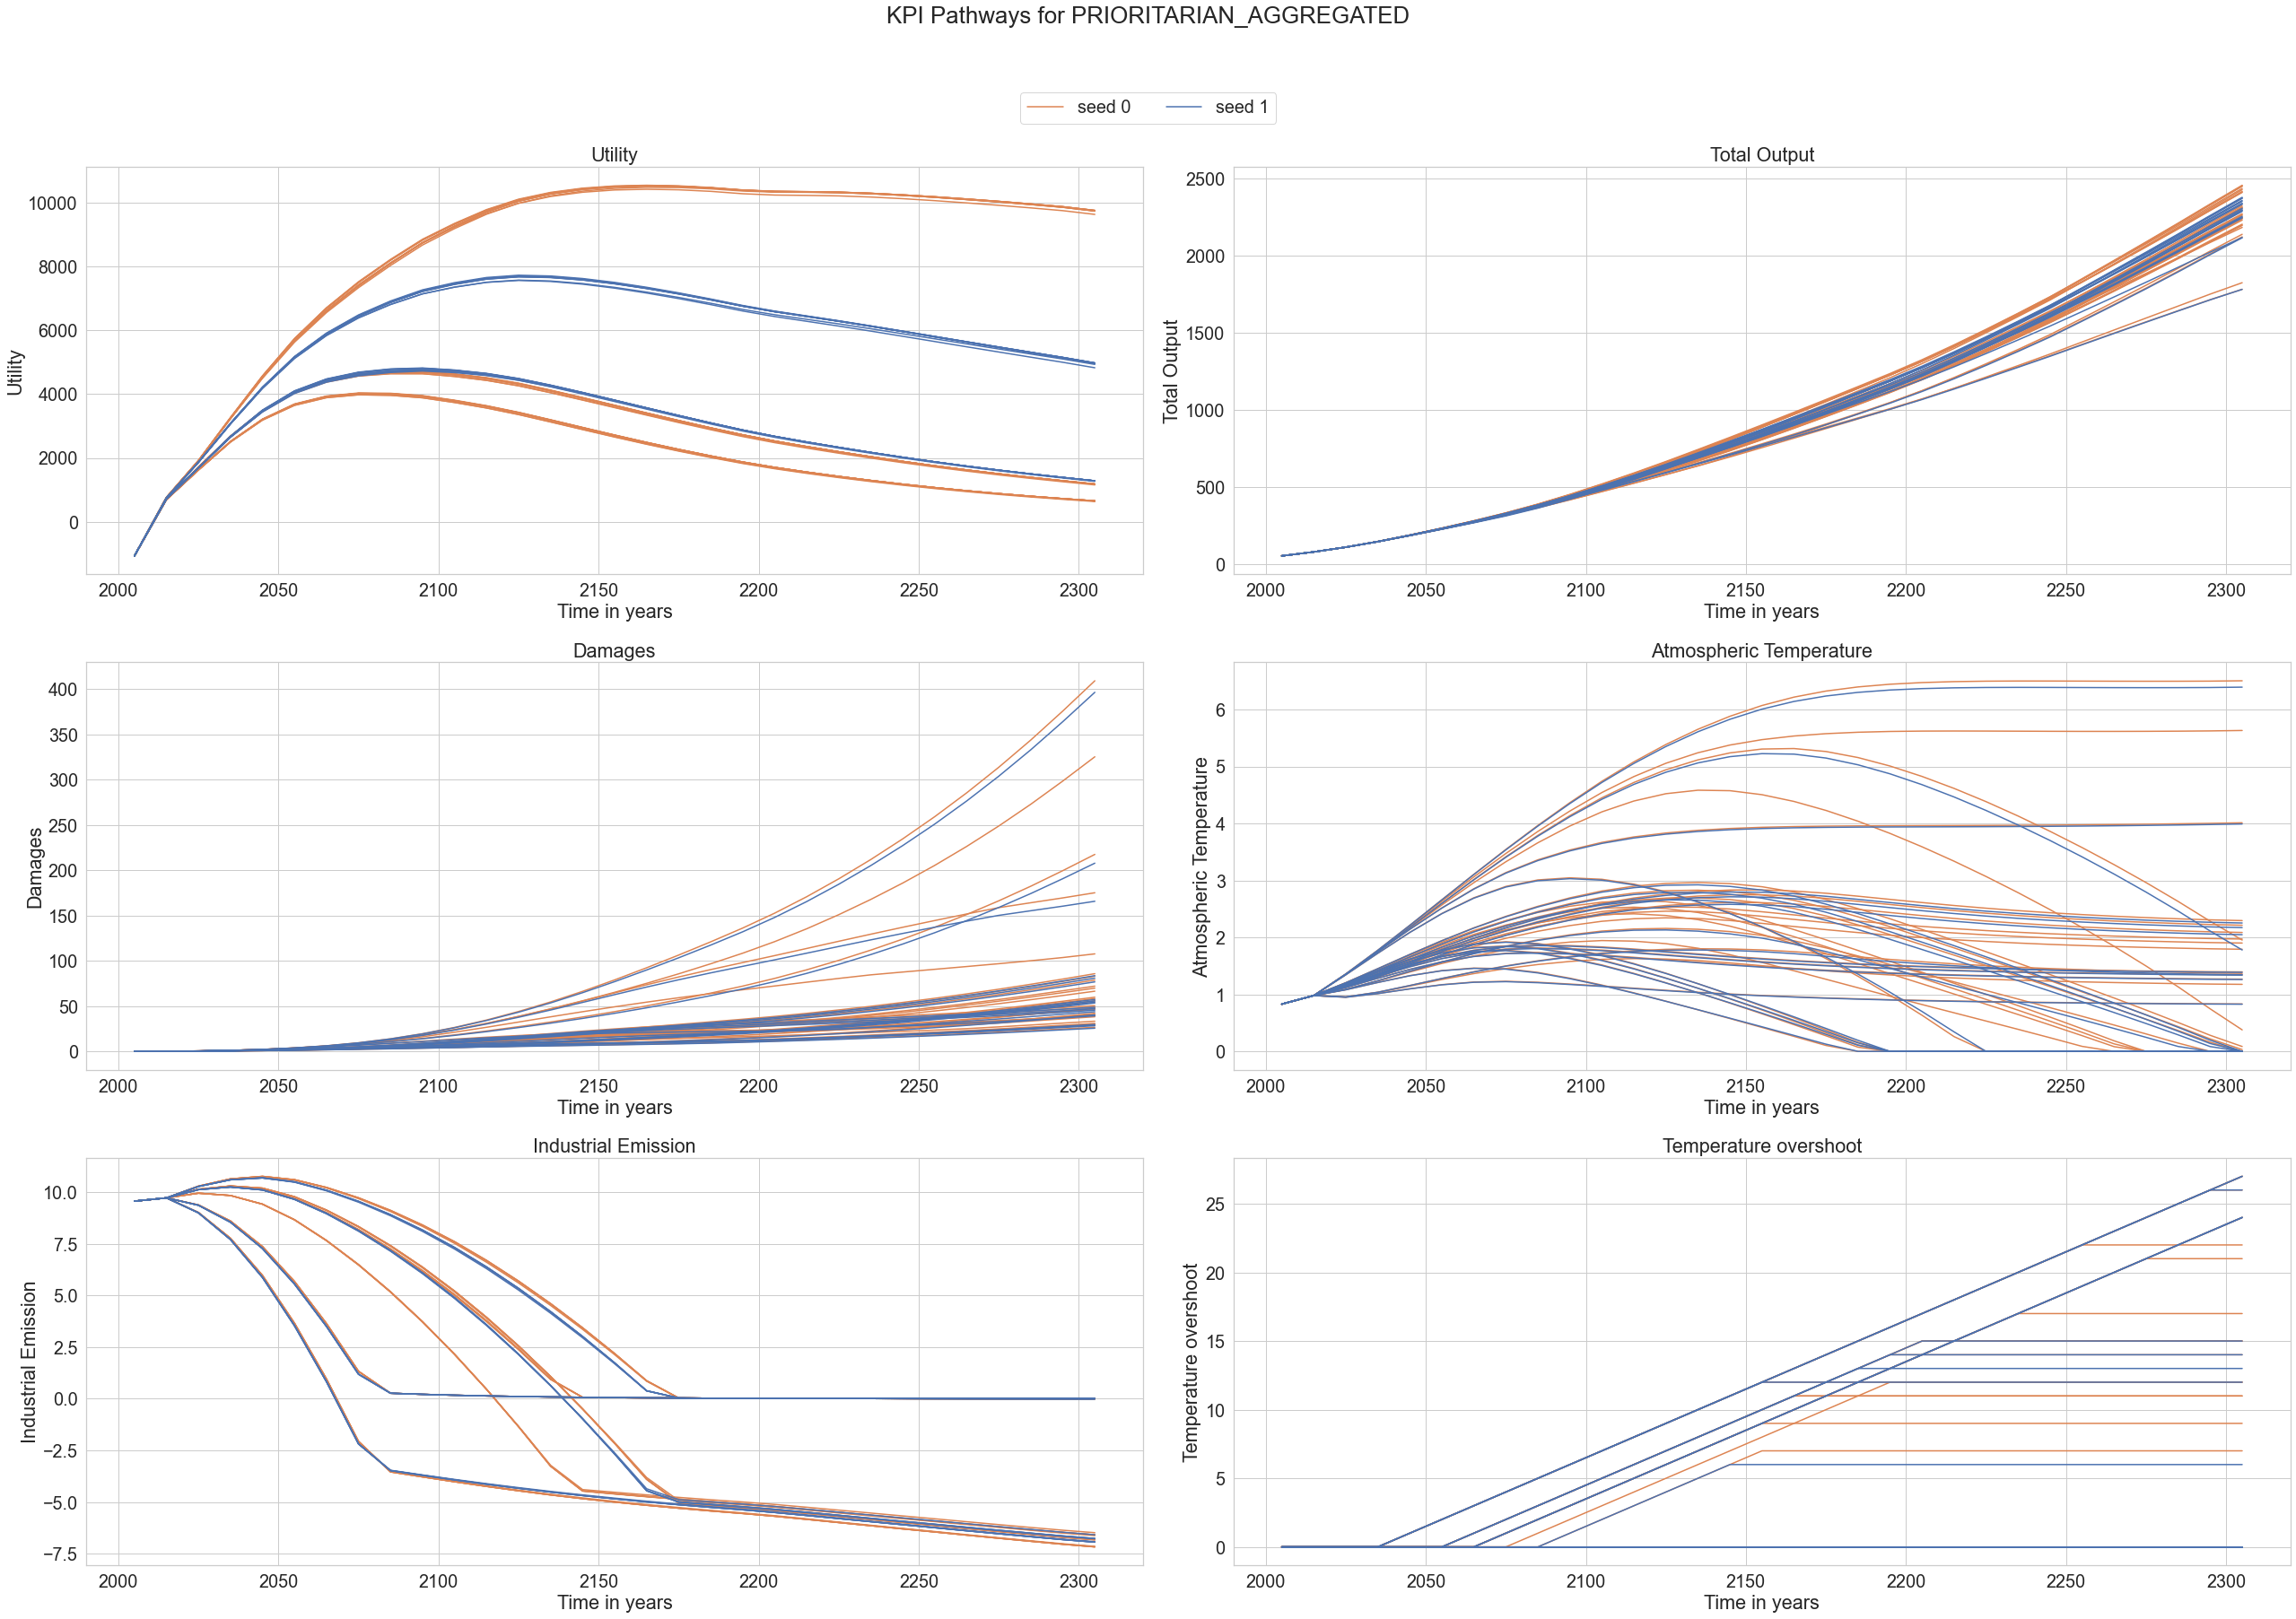

In [4]:
for problem_formulation, seeds_dict in problem_formulations.items():
    plot_kpi_pathways_with_seeds(
        seeds_dict=seeds_dict,
        problem_formulation=problem_formulation,
        saving=True,
        file_name=f'seed_analysis_{problem_formulation}_test.png'
    )